In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
x= heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [12]:
import pandas as pd

# Özellikler ve hedefi birleştirme
df= pd.concat([x, y], axis=1)

# Sonuçları kontrol etme
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [22]:
df=df.dropna()

In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [26]:
# eksik değerler silindi

In [28]:
import numpy as np

In [30]:
# aykırı gözlemler
columns=df.select_dtypes(include=[np.number]).columns
min_values=[]
max_values=[]
for column in columns:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    min_value =Q1-1.5*IQR
    max_value =Q3+1.5*IQR
    min_values.append(min_value)
    max_values.append(max_value)
    print(f"Column: {column}, Min Value: {min_value}, Max Value: {max_value}")

Column: age, Min Value: 28.5, Max Value: 80.5
Column: sex, Min Value: -1.5, Max Value: 2.5
Column: cp, Min Value: 1.5, Max Value: 5.5
Column: trestbps, Min Value: 90.0, Max Value: 170.0
Column: chol, Min Value: 113.5, Max Value: 373.5
Column: fbs, Min Value: 0.0, Max Value: 0.0
Column: restecg, Min Value: -3.0, Max Value: 5.0
Column: thalach, Min Value: 83.5, Max Value: 215.5
Column: exang, Min Value: -1.5, Max Value: 2.5
Column: oldpeak, Min Value: -2.4000000000000004, Max Value: 4.0
Column: slope, Min Value: -0.5, Max Value: 3.5
Column: ca, Min Value: -1.5, Max Value: 2.5
Column: thal, Min Value: -3.0, Max Value: 13.0
Column: num, Min Value: -3.0, Max Value: 5.0


In [32]:
for i,column in enumerate(columns):
    df=df[(df[column]>= min_values[i]) & (df[column]<=max_values[i])]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 2 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    float64
 12  thal      212 non-null    float64
 13  num       212 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 24.8 KB


In [36]:
# kategorik değişken olmadığı için kategorik değişkenlere uygulanan one-hot dönüşümü yapamıyoruz

#### Veri Görselleştirme

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


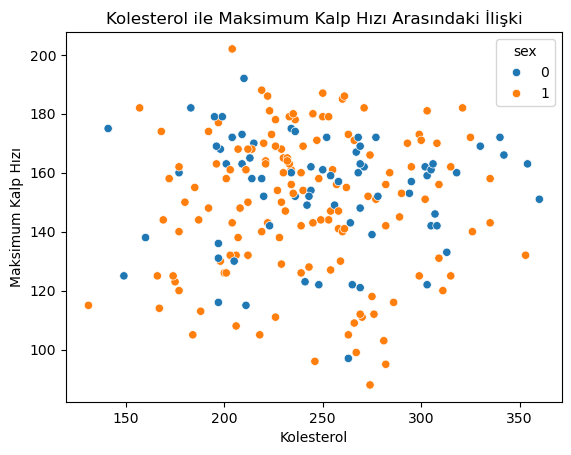

In [41]:
sns.scatterplot(x='chol', y='thalach', hue="sex",data=df)
plt.title('Kolesterol ile Maksimum Kalp Hızı Arasındaki İlişki')
plt.xlabel('Kolesterol')
plt.ylabel('Maksimum Kalp Hızı')
plt.show()

<Axes: xlabel='num', ylabel='age'>

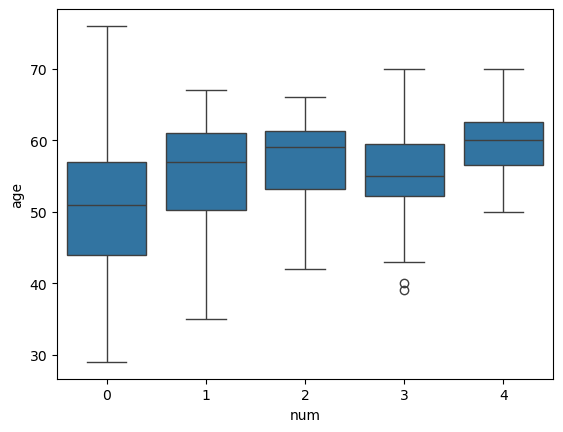

In [45]:
sns.boxplot(x='num', y='age', data=df)

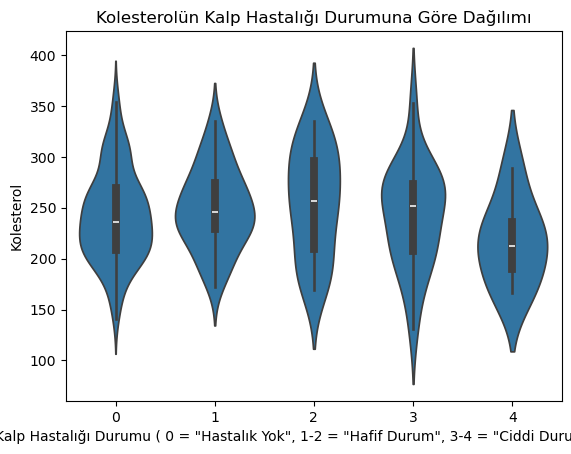

In [47]:
sns.violinplot(x='num', y='chol', data=df)
plt.title('Kolesterolün Kalp Hastalığı Durumuna Göre Dağılımı')
plt.xlabel('Kalp Hastalığı Durumu ( 0 = "Hastalık Yok", 1-2 = "Hafif Durum", 3-4 = "Ciddi Durum" gibi))')
plt.ylabel('Kolesterol')
plt.show()

In [49]:
correlation_matrix = df.corr()

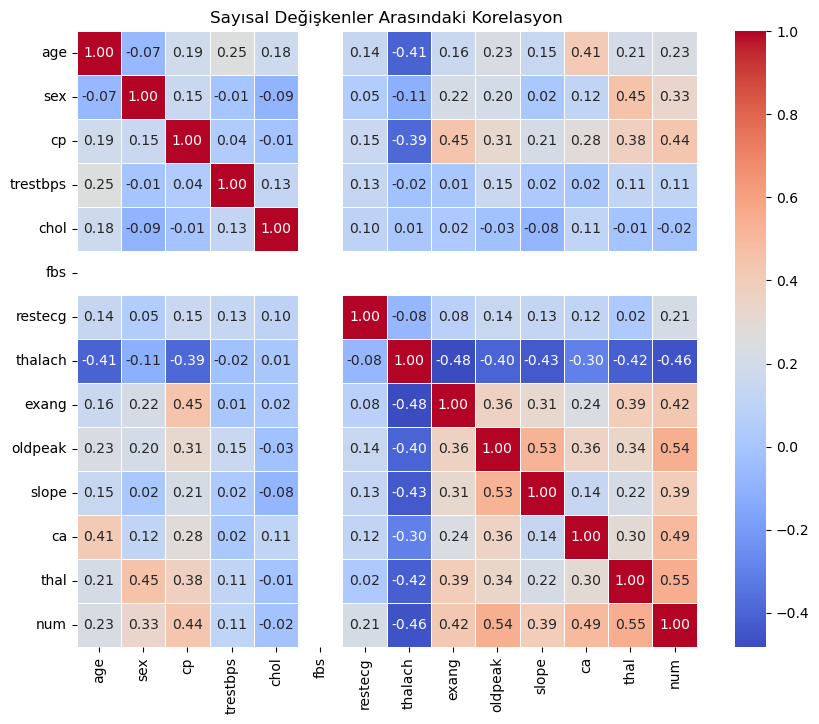

In [51]:
plt.figure(figsize=(10, 8))  # Grafik boyutunu ayarlayalım
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Sayısal Değişkenler Arasındaki Korelasyon')
plt.show()

In [53]:
# Tanımlayıcı istatistikler hesaplama
desc_stats = df.describe().T 

# Mod (en sık görülen değer) hesaplama
mode_stats = df.mode().iloc[0]  # İlk moda bakıyoruz

# Çarpıklık (skewness) ve basıklık (kurtosis) hesaplama
skewness = df.skew()
kurtosis = df.kurt()

print("Tanımlayıcı İstatistikler:")
print(desc_stats[['mean', '50%', 'std', 'min', 'max', '25%', '75%']])  # Ortalama, medyan, std, vb.
print("\nMod Değerleri:")
print(mode_stats)
print("\nÇarpıklık:")
print(skewness)
print("\nBasıklık:")
print(kurtosis)


Tanımlayıcı İstatistikler:
                mean    50%        std    min    max     25%    75%
age        53.306604   54.0   9.119291   29.0   76.0   45.75   60.0
sex         0.660377    1.0   0.474702    0.0    1.0    0.00    1.0
cp          3.316038    4.0   0.784402    2.0    4.0    3.00    4.0
trestbps  128.198113  130.0  14.958026   94.0  170.0  120.00  140.0
chol      243.924528  241.5  45.186543  131.0  360.0  210.75  271.5
fbs         0.000000    0.0   0.000000    0.0    0.0    0.00    0.0
restecg     0.924528    0.0   0.994755    0.0    2.0    0.00    2.0
thalach   150.745283  155.0  22.474445   88.0  202.0  137.50  168.0
exang       0.320755    0.0   0.467871    0.0    1.0    0.00    1.0
oldpeak     0.914623    0.6   1.030770    0.0    4.0    0.00    1.5
slope       1.542453    1.0   0.586652    1.0    3.0    1.00    2.0
ca          0.471698    0.0   0.684390    0.0    2.0    0.00    1.0
thal        4.594340    3.0   1.926509    3.0    7.0    3.00    7.0
num         0.830189 

In [55]:
# Kalp hızı ortalama 163 iken
#Çarpıklık -0.5 değeri genellikle veri setinin hafif sol çarpık olduğunu gösterir. 
#Yani, verinin çoğunluğu ortalamanın sağ tarafında yoğunlaşmışken, sol tarafta bazı daha düşük değerler bulunuyor. Ancak bu çarpıklık, anlamlı bir biçimde asimetriye yol açmaz ve genellikle veri üzerinde ciddi bir etki yaratmaz.
#Çarpıklık değeri -0.5 olan bir veri seti, çoğu zaman normal dağılıma yakın kabul edilebilir ve verilerin çoğu ortalamaya yakın olacaktır.

In [57]:
# genel olarak veri setinin çarpılığı düşük bu yüzden normale yakın dağılım beklenir

In [59]:
 df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

In [69]:
# Korelasyon matrisini hesaplama
corr_matrix = df.corr()

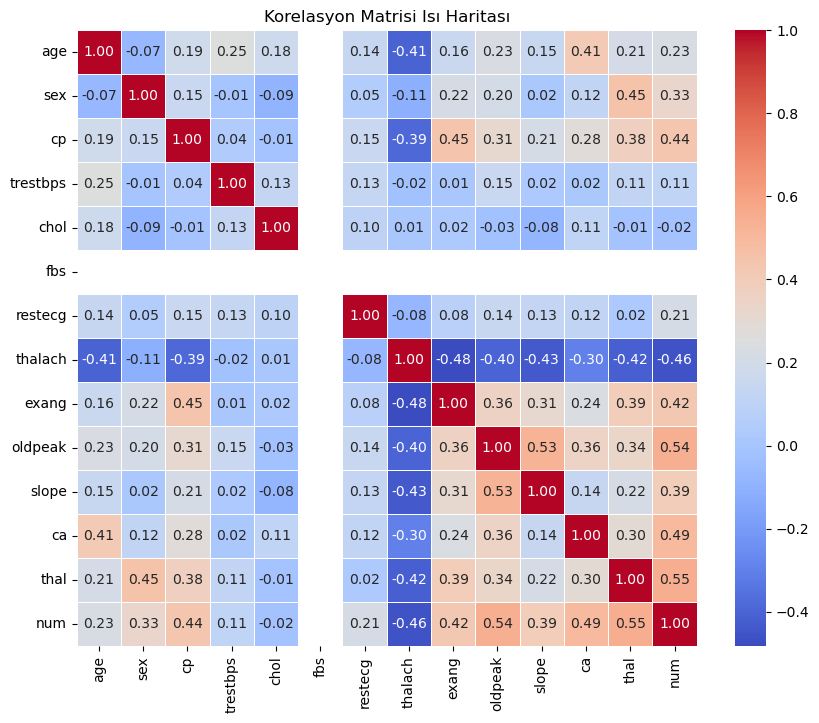

In [71]:
# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi Isı Haritası")
plt.show()

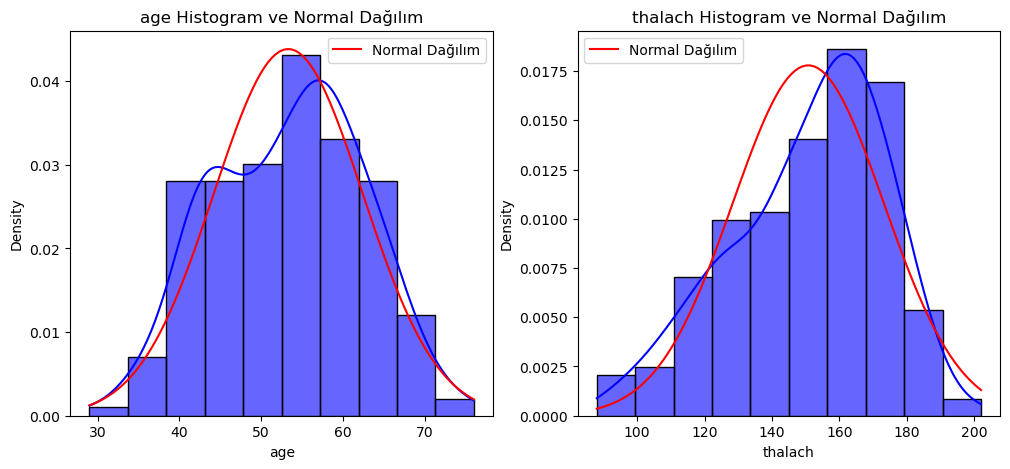

In [77]:
# Olasılık dağılımı analizi için değişken seçimi
feature1 = "age"
feature2 = "thalach"

# Histogram ve teorik normal dağılım
plt.figure(figsize=(12, 5))

for i, feature in enumerate([feature1, feature2], 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[feature], kde=True, bins=10, stat="density", color="blue", alpha=0.6)
    mu, std = norm.fit(df[feature])  # Normal dağılım parametreleri
    x = np.linspace(min(df[feature]), max(df[feature]), 100)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', label="Normal Dağılım")
    plt.title(f"{feature} Histogram ve Normal Dağılım")
    plt.legend()

plt.show()

In [81]:
# Kolmogorov-Smirnov testi
ks_test_age = kstest(df["age"], "norm", args=(df["age"].mean(), df["age"].std()))
ks_test_thalach = kstest(df["thalach"], "norm", args=(df["thalach"].mean(), df["thalach"].std()))

print("Kolmogorov-Smirnov Test Sonuçları:")
print(f"age p-değeri: {ks_test_age.pvalue}")
print(f"thalach p-değeri: {ks_test_thalach.pvalue}")

Kolmogorov-Smirnov Test Sonuçları:
age p-değeri: 0.11086191796845901
thalach p-değeri: 0.045777507855466526


Varyansın %90'ını açıklayan ana bileşen sayısı: 9


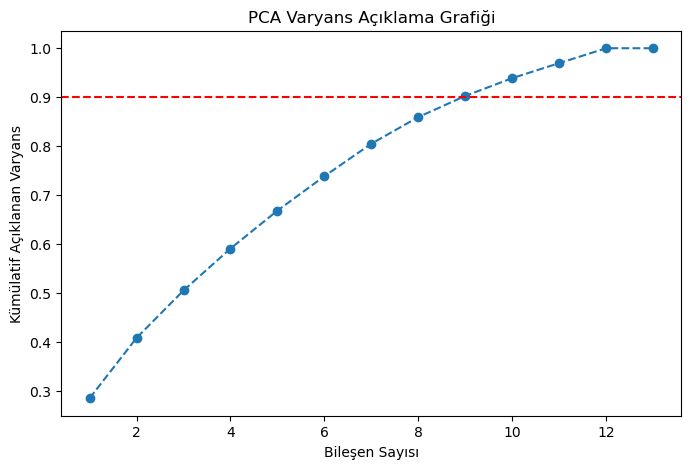

In [87]:
# PCA için veri standardizasyonu
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df.drop(columns=["num"])  # Hedef değişkeni çıkartıyoruz
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA uygulama
pca = PCA()
pca.fit(features_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Varyansın %90'ını açıklayan bileşen sayısını belirleme
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Varyansın %90'ını açıklayan ana bileşen sayısı: {n_components_90}")

# PCA sonuçlarını görselleştirme
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans')
plt.title('PCA Varyans Açıklama Grafiği')
plt.show()

In [101]:
# Hipotez Testleri
# Hipotez 1: Kalp hastalığı olan ve olmayan hastalar arasında ortalama kolesterol seviyelerinde önemli bir fark yoktur.
from scipy.stats import kstest, norm, ttest_ind, chi2_contingency
chol_hd = df[df["num"] > 0]["chol"]
chol_no_hd = df[df["num"] == 0]["chol"]
stat, p_value = ttest_ind(chol_hd, chol_no_hd, equal_var=False)
print(f"Kolesterol için t-testi p-değeri: {p_value}")

# Hipotez 2: Cinsiyet (sex) ve kalp hastalığı (num) arasında anlamlı bir ilişki yoktur.
contingency_table = pd.crosstab(df["sex"], df["num"])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Cinsiyet ve kalp hastalığı için Ki-Kare testi p-değeri: {p_value}")

Kolesterol için t-testi p-değeri: 0.5079141970186214
Cinsiyet ve kalp hastalığı için Ki-Kare testi p-değeri: 8.775090889502958e-06


In [107]:
# Hipotez Testleri
# Hipotez 1: Kalp hastalığı olan ve olmayan hastalar arasında ortalama kolesterol seviyelerinde önemli bir fark yoktur.
from statsmodels.stats.multitest import multipletests


chol_hd = df[df["num"] > 0]["chol"]
chol_no_hd = df[df["num"] == 0]["chol"]
stat1, p_value1 = ttest_ind(chol_hd, chol_no_hd, equal_var=False)

# Hipotez 2: Cinsiyet (sex) ve kalp hastalığı (num) arasında anlamlı bir ilişki yoktur.
contingency_table = pd.crosstab(df["sex"], df["num"])
chi2_stat, p_value2, dof, expected = chi2_contingency(contingency_table)

# Bonferroni düzeltmesi uygulama
p_values = [p_value1, p_value2]
adjusted_p_values = multipletests(p_values, method='bonferroni')[1]

print("Bonferroni Düzeltmesi Sonrası p-Değerleri:")
print(f"Kolesterol için t-testi düzeltilmiş p-değeri: {adjusted_p_values[0]}")
print(f"Cinsiyet ve kalp hastalığı için Ki-Kare testi düzeltilmiş p-değeri: {adjusted_p_values[1]}")

Bonferroni Düzeltmesi Sonrası p-Değerleri:
Kolesterol için t-testi düzeltilmiş p-değeri: 1.0
Cinsiyet ve kalp hastalığı için Ki-Kare testi düzeltilmiş p-değeri: 1.7550181779005917e-05


In [109]:
# Sonuçların değerlendirilmesi
alpha = 0.05
if adjusted_p_values[0] < alpha:
    print("Hipotez 1 reddedildi: Kalp hastalığı olan ve olmayan bireyler arasında kolesterol seviyelerinde anlamlı bir fark vardır.")
else:
    print("Hipotez 1 kabul edildi: Kolesterol seviyelerinde anlamlı bir fark bulunmamaktadır.")

if adjusted_p_values[1] < alpha:
    print("Hipotez 2 reddedildi: Cinsiyet ile kalp hastalığı arasında anlamlı bir ilişki vardır.")
else:
    print("Hipotez 2 kabul edildi: Cinsiyet ile kalp hastalığı arasında anlamlı bir ilişki bulunmamaktadır.")


Hipotez 1 kabul edildi: Kolesterol seviyelerinde anlamlı bir fark bulunmamaktadır.
Hipotez 2 reddedildi: Cinsiyet ile kalp hastalığı arasında anlamlı bir ilişki vardır.


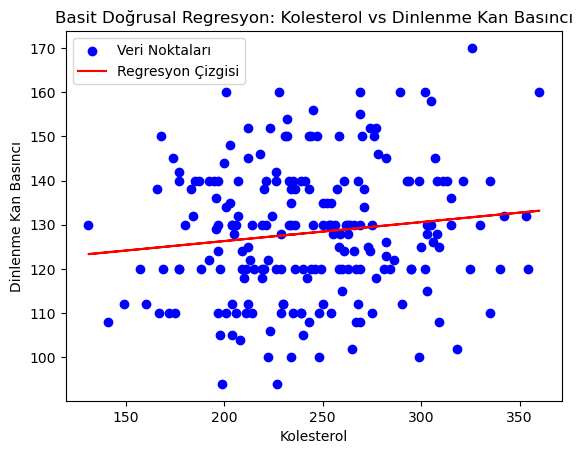

R-kare: 0.016789322659632067
Eğim (Slope): 0.04289254039005658
Y-Kesiği (Intercept): 117.735570525233
RMSE: 0.7910688966229741
MAE: 0.6456369212215303
R-kare: 0.42831733768343305
Düzeltilmiş R-kare: 0.17204579940359266


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Bağımlı ve bağımsız değişkenler
X = df[['chol']]  # Kolesterol seviyesini bağımsız değişken olarak alıyoruz
y = df['trestbps']  # Dinlenme kan basıncını bağımlı değişken olarak alıyoruz

# Basit doğrusal regresyon modelini oluşturma
model = LinearRegression()
model.fit(X, y)

# Eğim ve intercept
slope = model.coef_[0]
intercept = model.intercept_

# Regresyon çizgisini veri noktalarıyla birlikte görselleştirme
plt.scatter(X, y, color='blue', label='Veri Noktaları')
plt.plot(X, model.predict(X), color='red', label='Regresyon Çizgisi')
plt.xlabel('Kolesterol')
plt.ylabel('Dinlenme Kan Basıncı')
plt.title('Basit Doğrusal Regresyon: Kolesterol vs Dinlenme Kan Basıncı')
plt.legend()
plt.show()

# Model performansını değerlendirme (R-kare)
r2 = r2_score(y, model.predict(X))
print(f"R-kare: {r2}")
print(f"Eğim (Slope): {slope}")
print(f"Y-Kesiği (Intercept): {intercept}")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Bağımlı ve bağımsız değişkenler
X_multi = df[['age', 'sex', 'cp', 'chol', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_multi = df['num']  # Hedef değişken (num)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Çoklu doğrusal regresyon modelini oluşturma
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred = model_multi.predict(X_test)

# Model performansını değerlendirme
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_multi = r2_score(y_test, y_pred)

# Düzeltilmiş R-kare hesaplama
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2_multi) * (n - 1) / (n - p - 1)

# Sonuçları yazdırma
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-kare: {r2_multi}")
print(f"Düzeltilmiş R-kare: {adj_r2}")

In [117]:
import statsmodels.api as sm
import numpy as np

# Bağımsız ve bağımlı değişkenler
X_multi = df[['age', 'sex', 'cp', 'chol', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
X_multi = sm.add_constant(X_multi)  # Sabit terimi ekliyoruz
y_multi = df['num']

# Başlangıçta tüm özellikler ile regresyon modeli
model = sm.OLS(y_multi, X_multi).fit()

# Geriye doğru eleme yöntemi ile en düşük p-değeri olan özelliği çıkarıyoruz
while model.pvalues.max() > 0.05:  # p-değeri 0.05'ten büyükse özellik çıkarılır
    X_multi = X_multi.drop(model.pvalues.idxmax(), axis=1)
    model = sm.OLS(y_multi, X_multi).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                    num   R-squared (uncentered):                   0.706
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              70.49
Date:                Mon, 10 Feb 2025   Prob (F-statistic):                    3.82e-51
Time:                        14:56:32   Log-Likelihood:                         -246.33
No. Observations:                 212   AIC:                                      506.7
Df Residuals:                     205   BIC:                                      530.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Accuracy: 0.6976744186046512
Precision: 0.5789473684210527
Recall: 0.6875
F1-Score: 0.6285714285714286
ROC-AUC: 0.787037037037037


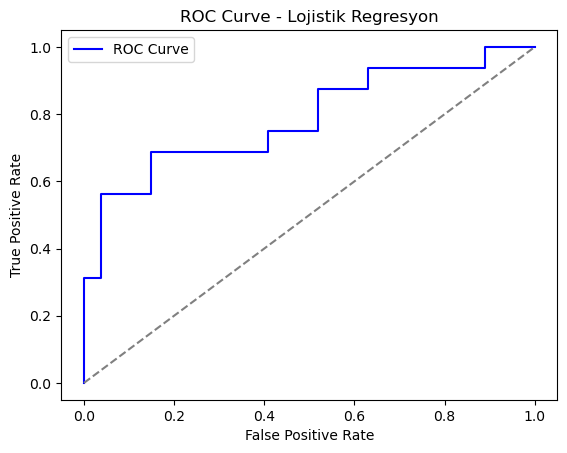

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Hedef değişkeni ikili hale getirelim (örneğin, kalp hastalığı var mı?)
y_class = (df['num'] > 0).astype(int)  # 1: Hastalık var, 0: Hastalık yok

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_class, test_size=0.2, random_state=42)

# Lojistik regresyon modelini oluşturma
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Test verisi üzerinde tahminler yapma
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları

# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Performans metriklerini yazdırma
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# ROC eğrisini çizme
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Lojistik Regresyon')
plt.legend()
plt.show()


In [121]:
# Katsayılar ve anlamlılıkları
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_

# Katsayıları ve intercept'i yazdırma
for feature, coef in zip(X_multi.columns, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")
print(f"Intercept: {intercept}")


Feature: sex, Coefficient: 0.9818090253129663
Feature: cp, Coefficient: 0.8209035073308959
Feature: restecg, Coefficient: 0.630540782268168
Feature: thalach, Coefficient: 0.0019321664329237562
Feature: oldpeak, Coefficient: 0.9023745607015644
Feature: ca, Coefficient: 1.481513237621225
Feature: thal, Coefficient: 0.5546354882654194
Intercept: [-8.48443595]


In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Karar ağacı modelini oluşturma
dt_model = DecisionTreeClassifier(random_state=42)

# Çapraz doğrulama ile karar ağacının performansını değerlendirme
cv_scores_dt = cross_val_score(dt_model, X_multi, y_class, cv=5, scoring='accuracy')
print(f"Decision Tree - Accuracy: {cv_scores_dt.mean()} ± {cv_scores_dt.std()}")


Decision Tree - Accuracy: 0.7401993355481727 ± 0.08165626662831893


In [125]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN modelini oluşturma
knn_model = KNeighborsClassifier()

# Çapraz doğrulama ile k-NN modelinin performansını değerlendirme
cv_scores_knn = cross_val_score(knn_model, X_multi, y_class, cv=5, scoring='accuracy')
print(f"k-NN - Accuracy: {cv_scores_knn.mean()} ± {cv_scores_knn.std()}")


k-NN - Accuracy: 0.7875968992248061 ± 0.04043310543119025


###### Model karşılaştırmasında, çapraz doğrulama sonuçlarına göre hangi modelin daha iyi performans gösterdiği belirlenebilir. Lojistik regresyon genellikle doğrusal ilişkilerde daha hızlı ve basit çözüm sunarken, karar ağacı ve k-NN daha esnek olabilir ancak daha fazla hesaplama gücü ve parametre ayarı gerektirir.

###### Modelin güçlü yönleri, verinin doğasına ve probleme bağlı olarak değişecektir.